In [1]:
%load_ext autoreload
%autoreload 2

In [106]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

## Strategy

* Suppose we have $n$ eggs
* While the first $n-1$ eggs are not broken, we will do a something like a Binary Search, but not always binary $O(log_{k} N)$
* When there is only one egg left, we will climb the floors one by one $O(log N)$
* doing monte carlo simulation, we will obtain the expected value of throws for each k

In [3]:
class Egg():
    def __init__(self, highest_floor : int) -> None:
        self.highest_floor = highest_floor
        self.broken = False
    
    def throw(self, floor):
        if floor > self.highest_floor:
            self.broken = True
    
    def is_broken(self):
        return self.broken

In [16]:
np.random.randint(1, 103)

86

In [17]:
num_eggs = 2
building_size = 102
highest_floor = np.random.randint(1, building_size + 1)

In [27]:
highest_floor

91

In [53]:
highest_floor = np.random.randint(1, building_size + 1)
eggs = [Egg(highest_floor) for i in range(num_eggs)]

step = 2
floor = building_size/step
tried_floors = []

# O(log N)
while len(eggs)>1:
    tried_floors.append(floor)
    eggs[0].throw(floor)

    if eggs[0].is_broken():
        eggs.pop(0)
    else:
        floor += int((building_size-floor)/step)
        

# O(N)
if len(tried_floors) < 2:
    floor = 0
else:
    floor = tried_floors[-2]
end_floor = tried_floors[-1]
while len(eggs) > 0 :
    tried_floors.append(floor)
    eggs[0].throw(floor)

    if eggs[0].is_broken():
        eggs.pop(0)
    else:
        floor += 1

    
num_tries = len(tried_floors)
broken_floor = tried_floors[-2]

In [54]:
num_tries, tried_floors, highest_floor

(18,
 [51.0,
  76.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0],
 65)

In [97]:
def eggs_experiment(
    num_eggs : int,
    building_size : int,
    step : int
):
    highest_floor = np.random.randint(1, building_size + 1)
    eggs = [Egg(highest_floor) for i in range(num_eggs)]

    floor = int(building_size/step)
    tried_floors = []

    # O(log N)
    while len(eggs)>1:
        tried_floors.append(floor)
        eggs[0].throw(floor)

        if eggs[0].is_broken():
            eggs.pop(0)
        else:
            delta = int((building_size-floor)/step)
            if delta == 0:
                eggs=[Egg(highest_floor)]
                break
            floor += delta
            
            

    # O(N)
    if len(tried_floors) < 2:
        floor = 0
    else:
        floor = tried_floors[-2]
    end_floor = tried_floors[-1]
    while len(eggs) > 0 :
        tried_floors.append(floor)
        eggs[0].throw(floor)

        if eggs[0].is_broken():
            eggs.pop(0)
        else:
            floor += 1

        
    num_tries = len(tried_floors)
    broken_floor = tried_floors[-2]

    return num_tries, broken_floor, highest_floor

In [112]:
N_TRIES = int(1e6)
results = { step : [] for step in range(2,11 )}
for step in range(2,11):
    for i in tqdm(range(N_TRIES)):
        num_tries, broken_floor, highest_floor = eggs_experiment(2, 102, step)
        if (broken_floor!=highest_floor):
            print(broken_floor, highest_floor)
            break
        results[step].append(num_tries)

100%|██████████| 1000000/1000000 [00:43<00:00, 23013.63it/s]


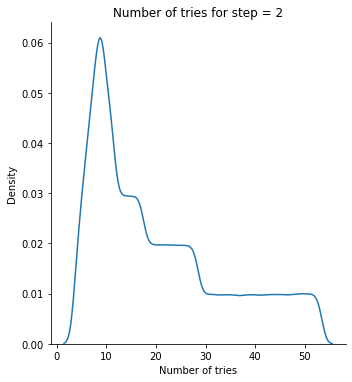

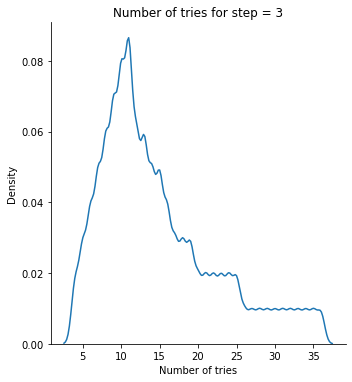

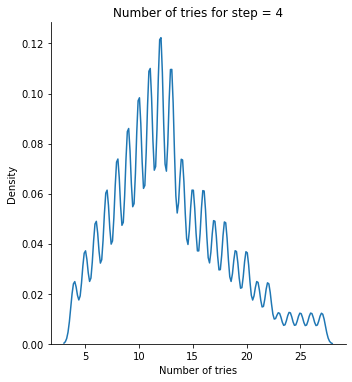

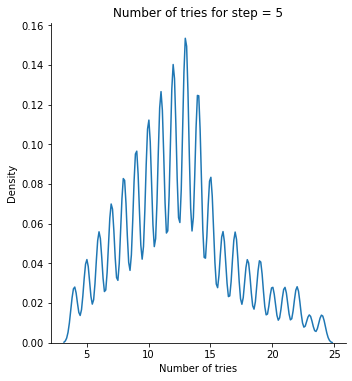

KeyboardInterrupt: 

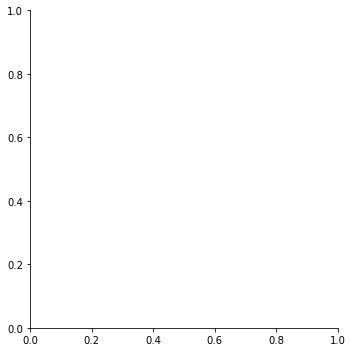

In [113]:
for step in results.keys():
    sns.displot(results[step], kind='kde')
    plt.title(f"Number of tries for step = {step}")
    plt.xlabel("Number of tries")
    plt.show()

In [114]:
([np.mean(results[step]) for step in results.keys()])

[20.477123,
 14.750398,
 12.906053,
 12.423584,
 12.460011,
 12.8069,
 13.579535,
 14.056185,
 15.132244]